# Approximation numérique de l'équation de diffusion thermique par la méthode de différences finies.

## Le modèle physique

On considère une barre métallique homogène de faible diamètre, de telle sorte que nous puissions négliger ses dimensions spatiales autre que sa longeur $ L $. La barre est un bon conducteur thermique de préférence, de coefficient de diffusion thermique $ D $.

Je vais considérer que cette barre est isolée sur toute sa longeur et que seules ses deux faces sont en contact avec l'extérieur. Cela pour pouvoir considérer que les flux d'énergie thermiques ne concernent que les deux parois extrémales de la barre. Bien sur, il n'existe aucune production d'énergie interne, par réaction chimique ou nucléaire. Notre dispositif ressemble à cela 

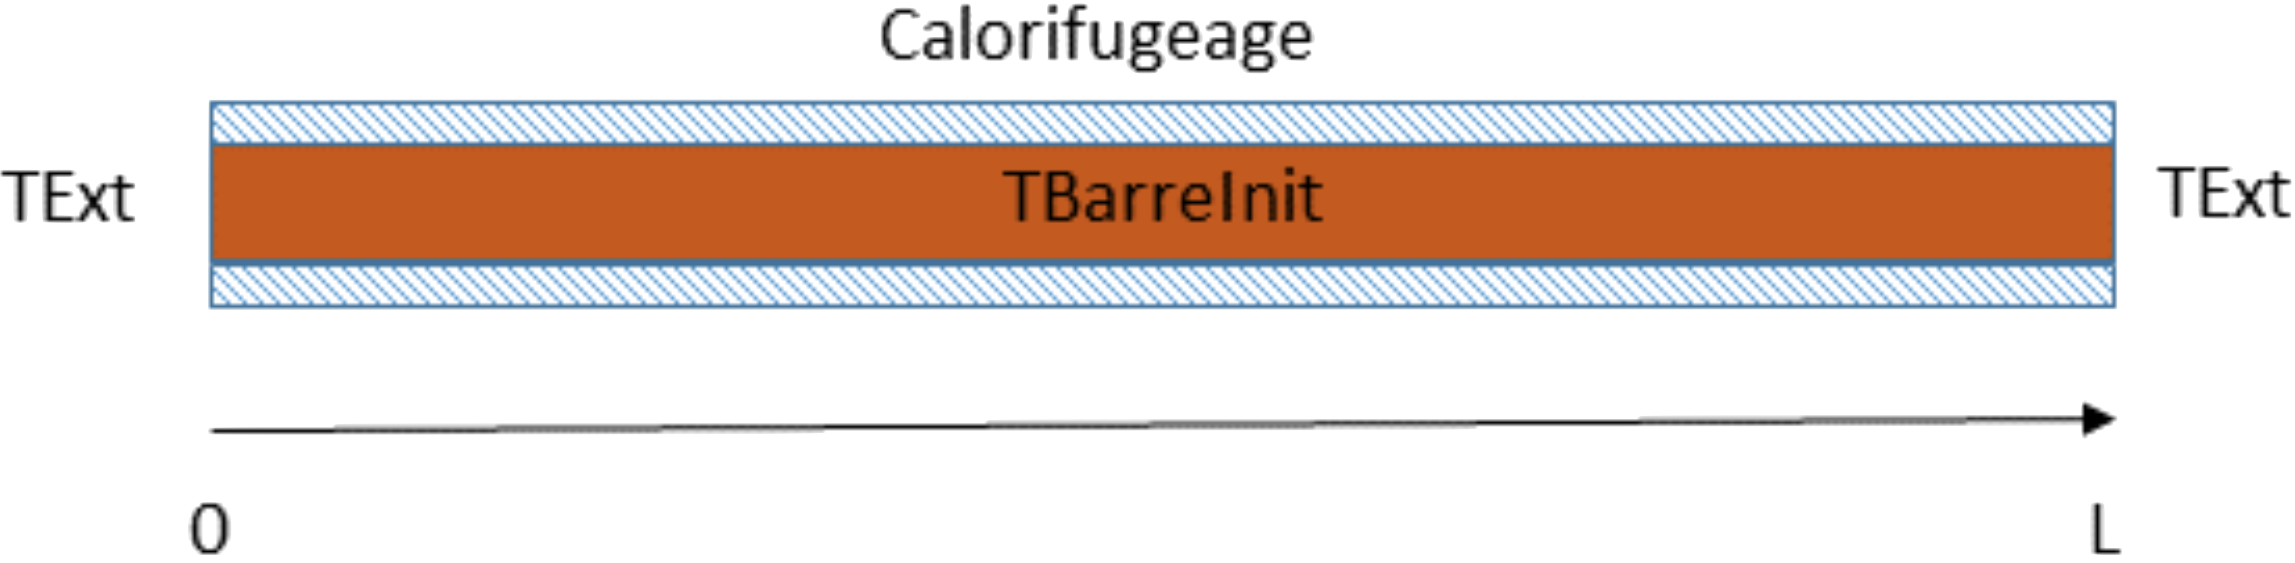

On chauffe de manière uniforme cette barre dans un four à une température de $ 500 $ K pour fixer les idées. Puis je la sors du four et je la laisse refroidir à l'air ambiant, disons à $ 293 $ K toujours pour fixer les idées. Alors, la temp\'erature $T(x,~t)$ de la barre est solution de l'\'equation de la diffusion thermique $1$D:

$$ \dfrac{\partial }{\partial t} T(x,t) = D \dfrac{\partial^2 }{\partial x^2}T(x,t)\,. $$


On pose maintenant les conditions initiales et les conditions aux limites de notre problème. 

## Conditions initiales et conditions aux limites

Le problème qu'on va aborder est un problème de Dirichlet (mathématicien allemand 1805-1859) : la température initiale de la barre est donnée $ \Big(T(x,0)=500\text{K}\Big) $ et la température de ses deux extrémités est identique et constante pendant toute l'expérience $ \Big(T(0,t)=T(L,t)=\text{TExt}\,\text{K}\Big) $. Le problème de Dirichlet consiste à trouver une fonction $T(x,t) $ sur un domaine spatial $[0,~L]$ pour $t > 0$ telle que:

$$ 
\left \{
\begin{array}{lcll}
T_t(x,t) = DT_{xx}(x,t)& \text{pour}& 0 \le x \le L ~ \text{et}~ t > 0&\\
T(x,0) = T_0(x)& \text{pour}& 0 \le x \le L &\text{la condition initiale}\\
T(0,t) = T_0\quad\text{et}\quad T(L,t) = T_L& \text{pour}& t > 0& \text{les conditions aux limites}
\end{array}
\right .
$$

## Le choix des schémas numériques

Un schéma numérique est un algorihme basé sur des considérations et des résultats d'analyse numérique, qui nous permettra de chercher les solutions numériques à une équation différentielle ordinaire ou aux dérivées partielles.

Dans la suite, on utilisera les schémas numériques basés sur la méthode des différences finies. Il s'agit d'une méthode très usitée en physique numérique pour construire les solutions aux EDP.

## La discrétisation de l'expérience

L'évolution de la température $ T(x,t) $ de la barre  évolue dans l'espace $ x $ et dans le temps $ t $ de façon continue sur une dur\'ee totale $\tau$. Notre objectif est de calculer la température  en chaque point de la barre à un instant $ t $ donné de l'expérience. On ne peut pas faire le calcul en tous points de la barre: On est obligé d'en choisir quelques uns. Je transforme l'espace continu de la barre en un ensemble représentatif de points de celui-ci. Je `discrètise` l'espace:

* La barre est spatialement discrétisée en $ n_x $ tronçons de longueur égale $dx =\frac{
L}{n_x-1}$. Ainsi, l'abscisse discrète $ x_j $ est:
$$ x_j=j\cdot dx\qquad\text{avec}~j\in[0,n_{x}-1]\,. $$
Il en est de même pour le temps: on ne peut pas faire le calcul pour tous les instants.

* De même, la durée totale d'évolution est discrétisé en $ n_t $ intervalles de durée $dt =\frac{\tau}{n_t}$. Ainsi, l'instant `discret` $ t_i $ est:
$$ t_i=i\cdot dt\qquad\text{avec}~i\in[0,n_t]\,. $$

On peut par conséquent poser la température discrétisée:

$$ T(x_j,t_i)=T\Big(j.dx,~i.dt\Big)=T_{j}^{i}\,. $$

En bref donc, je découpe l'espace, en l'occurence la longueur de la barre en un certain nombre d'intervalles de largeur $dx$ et je découpe le temps en intervalles de largeur $dt$.

Pour fixer les idées, j'imagine une grille dont chaque noeud représente un élement de l'espace-temps de mon expérience, la voici :

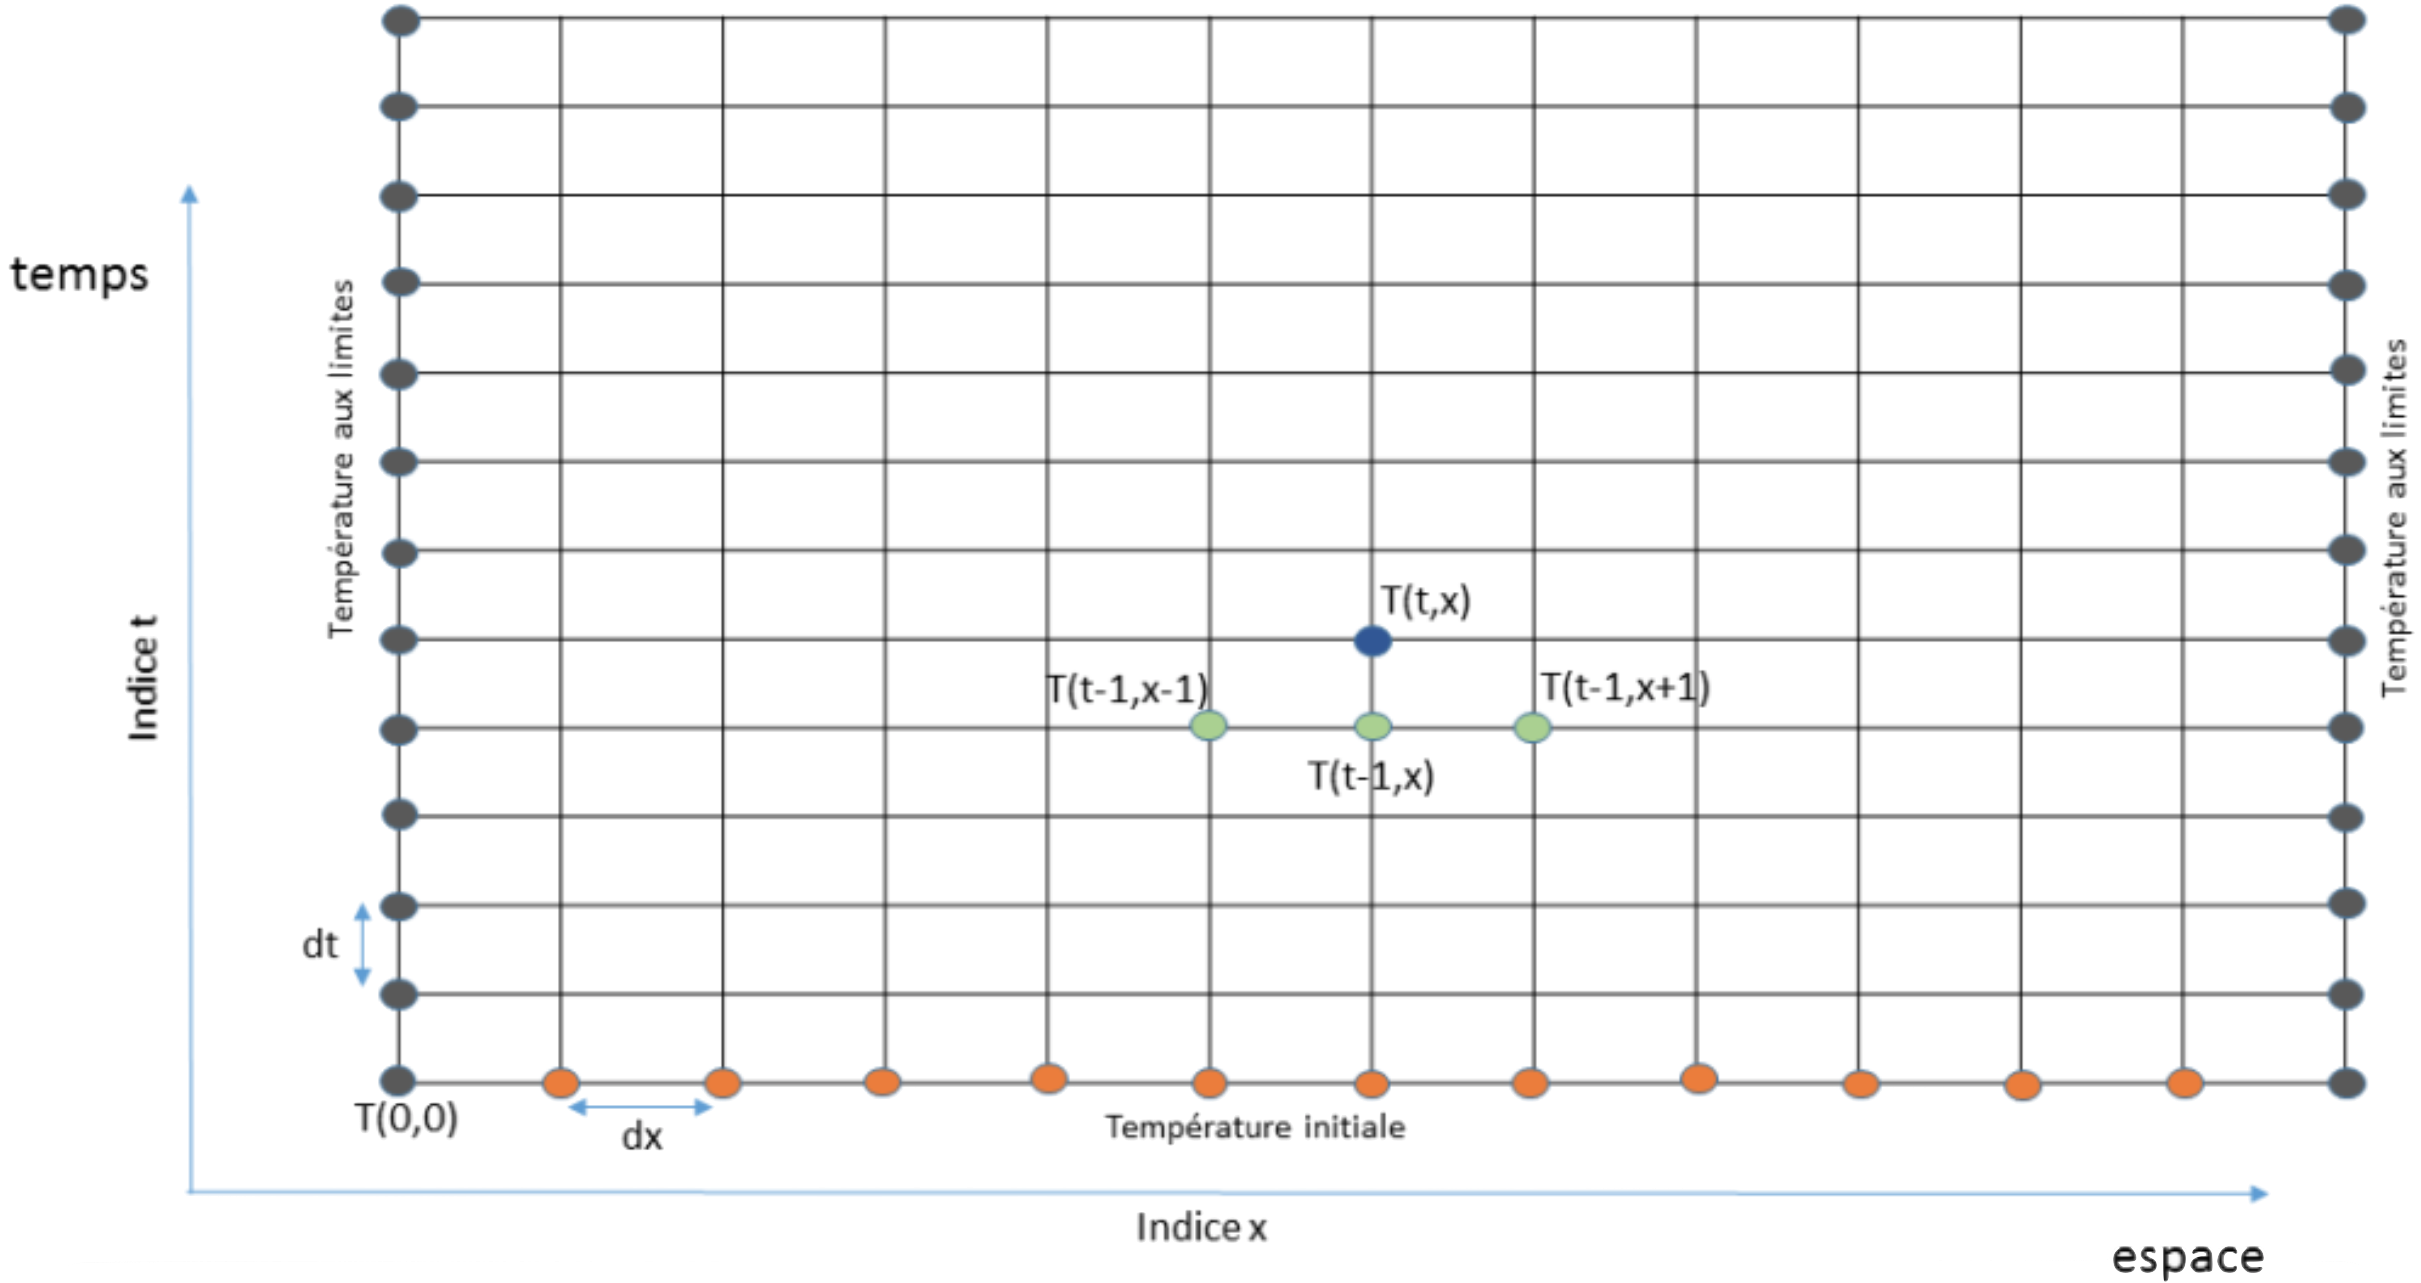

* Comme cette grille ressemble furieusement à une matrice, On va employer la notation matricielle pour désigner la température à ce noeud $T_{j}^{i}=T(x_j,~t_i) $, qui se lit "température au noeud d'abscisse $ x_j $ et d'ordonnée $ t_i $". On appelle cette grille un maillage.
	
* La ligne du bas représente l'état de la barre à l'instant $ t_0=0 $ de l'expérience. En chaque noeud de cette ligne $ (x_j,t_0) $ la température de la barre $ T_{j}^{0} $ est définie et égale à la température initiale (qu'on note TBarreInit) partout, sauf aux extrémités, parce qu'on a convenu que la barre étant à l'air ambiant et que le contact thermique était parfait
	 
* Donc, pendant toute la durée de l'expérience, les deux extrémités de la barre $ (x_0,t) $ et $ (x_{n_{x}-1},t) $ sont à une température constante, qu'on note `TExt`. Sur la grille cela est schématisé par les noeuds noirs sur ses bords gauche et droit.

<i> Le but de la manoeuvre est de calculer la température $ T $ pour tous les noeuds $T_{j}^{i}=T(x_j,~t_i) $ de la grille, pour $ j\in[0,n_x-1] $ et pour $i\in[0,n_t]$. Pour ce faire, il existe plusieurs méthodes. On va en voir le schéma explicite `FTCS`.</i>


## Utiliser le schéma explicite FTCS

`FTCS signifie forward in time, centered in space`.

En suivant la même méthode, je discrétise le membre de droite, ce qui me donne :
$$ \dfrac{\partial^2 T(x_j,t_i)}{\partial x^2} \approx \dfrac{T(x_{j+1},t_i)  - 2T(x_j,t_i) + T(x_{j-1},t_i)}{dx^2}\approx \dfrac{T_{j+1}^{i}  - 2T_{j}^{i} + T_{j-1}^{i} }{dx^2}\qquad\text{et}\qquad \dfrac{\partial T (x_j,t_i)}{\partial t} =\dfrac{T(x_{j},t_{i+1}) - T(x_{j},t_{i})}{dt}\,.
$$

D'où mon EDP discrétisée :
$$\dfrac{\partial T(x_j,t_i)}{\partial t} = D \dfrac{\partial^2 T(x_j,t_i)}{\partial x^2}\quad\Longleftrightarrow\quad \dfrac{T_{j}^{i+1} - T_{j}^{i}}{dt} =D\dfrac{T_{j+1}^{i}  - 2T_{j}^{i} + T_{j-1}^{i} }{dx^2}$$ 
ou encore :
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
$$ T_{j}^{i+1} = T_{j}^{i} +D\Big(\dfrac{dt}{dx^2}\Big) \Big( T_{j-1}^{i}  - 2T_{j}^{i} +T_{j+1}^{i}\Big)\,. $$  
</p>
</div>


Si nous revenons à notre grille, vous comprendrez vite le nom du schéma : je calcule la température en un noeud et à un instant donné en utilisant la température à l'instant précédent pour les noeuds situés en dessous et de part et d'autre du noeud courant.

Ce schéma est très simple, mais présente un inconvénient majeur: il est instable ! Pour certaines valeurs de $ dx $ et $ dt $, il explose littéralement en donnant des valeurs astronomiques. Il reste stable sous la condition que $$ dt< \frac{dx^2}{2D}\,,$$ condition qu'il faudra tester dans notre script. Pour information, cette condition s'appelle la condition de Courant-Friedrich-Levy, ou `CFL`.

### Application Python

In [5]:
import numpy as np
from scipy.sparse import diags
import matplotlib . pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

On s'intéresse à l'équation de la __chaleur__ (diffusion thermique) sur une durée $\tau=1$s d'une barre métallique de longeur $ L=1$cm en une dimension d'espace
$$ \dfrac{\partial T}{\partial t} = D \dfrac{\partial^2 T}{\partial x^2}\qquad \text{avec}~D=0.5\,. $$

Avec les conditions aux limites suivantes sur $ T (x, t) $ :
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
$$ \left\{
\begin{array}{lc}
T(0,t)=0\quad\text{et}\quad T(1,t)=0\,,& \forall~t\geq0\\
T(x,0)=500\,,& \forall~0<x<1\\
\end{array}
\right.  $$   
</p>
</div>

On discrétise le problème, on applique la <i> `méthode de différences finis` </i>:

* Selon $x$, on considère $n_x = 100$ points sur l’intervalle $[0, 1]$. 
* Selon $t$, on considère $n_t = 1000$ points entre $t = 0$ et $t = 0,1$. 
* Le $ (n_x-2)-$uplet $ (T_{1}^{i},\cdots,T_{n_x-2}^{i}) $ sera stocké dans un tableau NumPy noté $ T $ en ajoutant les valeurs aux limites $T_{0}^{i}$ et $T_{n_x-1}^{i}$.
On commence le programme  par la définition des paramètres L, tau, D, imax, jmax, dx et dt.

In [6]:
#PARAMÈTRES PHYSIQUES
L=1.0         #Longueur de la barre
tau=1.0       #Duree totale evolution
D=0.5         #Coefficient de diffusion thermique

#PARAMÈTRES NUMÉRIQUES
nx=100      #Nombre de troncons
nt=10000    #Nombre intervalles de temps
dx=L/(nx-1)       #Longueur tronçon
dt=tau/nt     #Intervalle elementaire de temps

__Question1.__  Initialiser le tableau $ T $ en $i = 0$, à l'aide des conditions aux limites.
* Tester le programe en utilisant le `print("T0=",T0)`,
* puis tracer sa courbe représentative.

__Question2.__ 
* Contrairement à ce qui se passe avec une `EDO`, on évite de stocker la solution numérique d’une `EDP` à chaque instant (la place mémoire devient vite très grande).
    * La solution à l’instant $i$ est en fait stockée dans un tableau à une dimension, de taille $n_x$, nommé $T$.
    * La solution à l’instant $i$ des accroissements de température est stockée dans un tableau, de taille $n_x$, nommé ${\rm accroiss} T $.

* Ecrire une boucle qui calcule la valeur des accroissements de température ${\rm accroiss} T_{j}^{i} $ à rajouter à $ T_{j}^{i} $ pour obtenir $ T_{j}^{i+1} $.
     <div style="color:white;
               display:fill;
               border-radius:5px;
               background-color:#5642C5;
               font-size:110%;
               font-family:Verdana;
               letter-spacing:0.5px">

    <p style="padding: 10px;
                  color:white;">
    $$ {\rm accroiss} T[j]= D\dfrac{dt}{dx^2}\Big(T[j-1]  - 2T[j] + T[j+1]\Big)\,. $$  
    </p>
    </div>
     
     * A la fin du pas de temps, afin d'obtenir la solution à l'instant $i+1$ on rajout à la valeur de ${\rm accroiss} T$  la valeur de $ T $ et on met à jour la solution en copiant ${\rm accroiss} T + T $ dans $T$.

* Pour la prise en compte des conditions aux limites, deux approches sont possibles: 
    * La première consiste à traiter différemment les cas $j=0$ et $j=n_x-1$.
    * La deuxième évite ce traitement particulier en élargissant le tableau $T$ avec la taille $n_x$, et à imposant en permanence $T(0)=0$ et $T(n_x-1=1)=0$ (mais alors attention à la mise à jour de $T$ par ${\rm accroiss} T + T $).
 
* Dans la même boucle, enregistrer les valeurs de  $ T $ pour $ 10 $ valeurs de $ t $ régulilièrement réparties dans l'intervalle considèré.
    * Pour écrire les valeurs de $ T $ pour $ 10 $ valeurs de $ t $, c'est facile d'utiliser l'opérateur modulo            $\%$ : `if (i % 1000 == 0):`.
    * Pour sauvegarder le tableau $T$ pour les $ 10 $ valeurs de $ t $, on utilise la matrice                              `Res=np.zeros((10,nx))`.

In [8]:
accroissT=np.zeros(nx)
Res=np.zeros((10,nx))
coef=( dt*D ) / ( dx ** 2 ) 

__Question3.__
Dans une même figure, tracer $ T $ en fonction de $ x $ pour les $ 10 $ valeurs de $ t $ Trouvées dans la questions précédente. On précisera une légende sur le tracé à l'aide des arguments de la commande plot suivants :

* Ajouter un titre au graphique __Evolution de la température (Schéma explicite)__
* Pour écrire la légende : `label="t = %1.2f s" %(0.1*i)`.
* Pour fixer la couleur de la courbe :  `plt.get\_cmap('copper')(float(i)/(7))`

__Question4.(Instabilités)__

 A présent, vous allez étudier le comportement des solutions numériques lorsque la condition `CFL` n’est pas respectée. Prenez $D = 0.6$, et observez le comportement des solutions numériques correspondants aux conditions initiales vues précédemment.

Précisez à partir de quel temps les oscillations apparaissent.

## Utiliser le schéma implicite

Le but de cette section est de modifier le programme pour utiliser le `schéma implicite`. Le maillage est le même que précédemment. Donc le schéma s'écrit sous la forme matricielle suivante :
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
$$\dfrac{T_{j}^{i+1} - T_{j}^{i}}{dt} =D\dfrac{T_{j+1}^{i+1}  - 2T_{j}^{i+1} + T_{j-1}^{i+1} }{dx^2}\Longleftrightarrow T_{j}^{i+1} = T_{j}^{i} +D\Big(\dfrac{dt}{dx^2}\Big) \Big(T_{j+1}^{i}  - 2T_{j}^{i} + T_{j-1}^{i}\Big) \Longleftrightarrow (I+dtA)T^{i+1}=T^{i}\,. $$  
</p>
</div>
où
$$
A=\frac{D}{dx^2}
\left(
\begin{array}{rrrrr}
2& -1& \\
-1&2&-1\\
&\ddots&\ddots&\ddots\\
&&\ddots&\ddots&-1\\
&&&-1&2\\
\end{array}
\right)\qquad\text{et}\qquad 
T^{i}=
\left(
\begin{array}{l}
T_{0}^{i}\\
\vdots\\
T_{j}^{i}\\
\vdots\\
T_{n_x-1}^{i}\\
\end{array}
\right)
$$

Notez que la matrice $A$ est symétrique définie positive et il en est de même pour la matrice $I + dtA$, et le système peut être résolu la méthode de `Cholesky`. Attention cependant : pour économiser du temps calcul, il faut effectuer la factorisation une seule fois, avant la boucle en temps.

Ce schéma présente l’avantage d’être stable sans condition `CFL` : le pas de temps peut donc être aussi grand que l’on veut.

__Question5.__  Dans un premier temps, testez ce schéma avec le même pas de temps que le `schéma explicite`, sur la condition initiale créneau, et vérifiez que vous obtenez à peu prés la même solution.

In [ ]:
I = np.identity(nx)
k = [-1*np.ones(nx-1),2*np.ones(nx),-1*np.ones(nx-1)]
offset = [-1,0,1]
A = (D/dx**2)*diags(k,offset).toarray()

__Question6.__ Vérifiez ensuite que la solution reste stable, et de même qualité, avec $D=0.6$, sur la condition initiale créneau.

## Convergence du schéma

En introduisant un `développement de Taylor`, on peut estimer la qualité de l’approximation numérique (évolution de l’erreur en fonction de $dx$ et $dt$). Ainsi, la formule de `Taylor-Young` à l’ordre $5$ selon la variable $x$ va s’écrire :

$$ T_{j+\alpha}^{i}=T_{j}^{i}
+\alpha dx \left(\frac{\partial T_{j}^{i}}{\partial x}\right)
+\alpha^2 \frac{dx^2}{2!} \left(\frac{\partial^2 T_{j}^{i}}{\partial x^2}\right)
+\alpha^3 \frac{dx^3}{3!} \left(\frac{\partial^3 T_{j}^{i}}{\partial^3 x}\right)
+\alpha^4 \frac{dx^4}{4!} \left(\frac{\partial^4 T_{j}^{i}}{\partial^4 x}\right) 
+\alpha^5 \frac{dx^5}{5!} \left(\frac{\partial^5 T_{j}^{i}}{\partial^5 x}\right)
+\mathcal{O}(dx^6)   $$
et en sommant les expressions pour $ \alpha=1 $ et $ \alpha=1 $ les termes impairs s'annulent :
$$ T_{j-1}^{i}+T_{j+1}^{i}=2T_{j}^{i}+ dx^2  \left(\frac{\partial^2 T_{j}^{i}}{\partial x^2}\right)  + \frac{dx^4}{12} \left(\frac{\partial^4 T_{j}^{i}}{\partial^4 x}\right)
+\mathcal{O}(dx^6)  $$
donc
$$  \frac{\partial^2 T_{j}^{i}}{\partial x^2}  =\frac{T_{j-1}^{i}+T_{j+1}^{i}-2T_{j}^{i}}{dx^2}-  \frac{dx^2}{12} \left(\frac{\partial^4 T_{j}^{i}}{\partial^4 x}\right)
+\mathcal{O}(dx^4)\,.$$
Un calcul similaire en temps permet d'estimer l'erreur "de troncature" associ\'ee \`a notre sch\'ema discret
$$  \frac{\partial T_{m,n}}{\partial t}  =\frac{T_{m,n+1}-T_{m,n}}{dt}-\frac{dt}{2} \left(\frac{\partial^2 T_{m,n}}{\partial^2 t}\right)
+\mathcal{O}(dt^2)\,.$$
Finallement
$$R(T)=\frac{dt}{2} \left(\frac{\partial^2 T_{j}^{i}}{\partial^2 t}\right)-  D\frac{dx^2}{12} \left(\frac{\partial^4 T_{j}^{i}}{\partial^4 x}\right)
+\mathcal{O}(dt^2)+\mathcal{O}(dx^4)\,.$$
On peut essayer de vérifier numériquement que le schéma utilisé est bien d'ordre deux en espace.

Le but des questions qui suivent est de mesurer l'erreur $$\|T_{\text{ana}}-T\|_{\infty}=\max\limits_{0\leq j \leq n_x} |T_{\text{ana}}[j]-T[j]|$$ entre la solution calculée $ T $ et la solution analytique $ T_{\text{ana}} $ pour différents pas $ dx $.

__Question1.__ La solution analytique est donnée par 
$$T(x,~0) = \sin(2\pi x)\quad \text{et}\quad T(x,~t) = T(x,~0)\,exp(-4\pi^2D\tau)\,,\quad\text{ pour}\quad t \in [0,~ \tau]\,.$$
Refaire le schéma explicite, on prendra $\tau=0.1$.

__Question2.__ Soit $$nx=[10,~15,~20,~25,~30,~35,~40,~45,~50]\,.$$
Ecrire une boucle qui calcule l'erreur $ERR[k]$ et qui note le pas $DDX[k]$ correspondant pour chaque valeur de $n_x$.

In [9]:
nx=[10,15,20,25,30,35,40,45,50]
DDX=np.zeros(len(nx))
ERR=np.zeros(len(nx))

__Question3.__  Tracer l'erreur en fonction du pas.

* Ajouter un titre au graphique __Ordre et vitesse de convergence__
* On pourra utiliser une échelle logarithmique.
* Tracer dans la mėme figure les fonctions suivantes (qui nous aide à trouver graphiquement l'orde de chaque schéma):
    * `plt.loglog(DDX,1*DDX**2,'--k',label='$d x^2$')`
    * `plt.loglog(DDX,ERR,'o--',label='ERR')`